# 2D Relationship Testing

Testing relationships between structures on a single slice

## Setup

### Imports

In [1]:
# Local functions and classes
from types_and_classes import *
from utilities import *
from debug_tools import *
from relations import *


In [2]:
%matplotlib inline

## Relationship Tests by Relationship Type

### Color Coding
<table style="border: 2px solid black; width=50px;"><tr><td>
<ul style="font-weight: 900; font-size: 20px;">
<li style="color: blue;">region a</li>
<li style="color: green;">region b</li>
<li style="color: orange;">intersection of a & b</li></ul>
</tr></td></>

## Contains

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Contains</th><th>Transitive</th></tr>
<td class="d" colspan="2">
All points of <span class="b">b</span> lie in the interior of <span class="a">a</span>, no points of <span class="b">b</span> lie in the exterior of <span class="a">a</span>, some points in <span class="a">a</span> are exterior to <span class="b">b</span>, and the boundaries of <span class="a">a</span> and <span class="b">b</span> do not intersect.
</td></tr>
<tr><td colspan="2">
<img src="Images/Relationships/contains simple.png" alt="Contains">
<img src="Images/Relationships/contains with hole.png" alt="Contains With Hole">
</td></tr>
</table></td></tr></table>

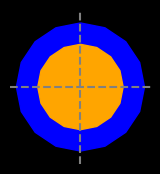

Relationship: Contains


In [3]:
def contains_centered_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    a = StructureSlice([circle6])
    b = StructureSlice([circle4])
    return a, b

a, b = contains_centered_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

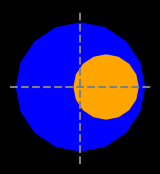

Relationship: Contains


In [4]:
def contains_offset_x_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle3_offset_x = shapely.Polygon(circle_points(1.5, offset_x=1.2))
    a = StructureSlice([circle6])
    b = StructureSlice([circle3_offset_x])
    return a, b

a, b = contains_offset_x_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

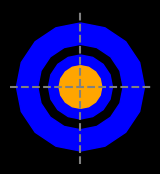

Relationship: Contains


In [ ]:
def contains_island_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle3 = shapely.Polygon(circle_points(1.5))
    circle2 = shapely.Polygon(circle_points(1))
    a = StructureSlice([circle6, circle4, circle3])
    b = StructureSlice([circle2])
    return a, b

a, b = contains_island_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

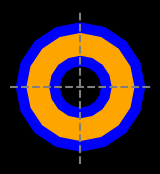

Relationship: Contains


In [ ]:
def contains_embedded_ring_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle5 = shapely.Polygon(circle_points(2.5))
    circle3 = shapely.Polygon(circle_points(1.5))
    circle2 = shapely.Polygon(circle_points(1))
    a = StructureSlice([circle6, circle2])
    b = StructureSlice([circle5, circle3])
    return a, b

a, b = contains_embedded_ring_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

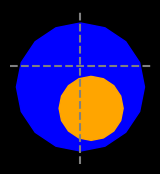

Relationship: Contains


In [ ]:
def contains_offset_xy_example():
    circle6_offset = shapely.Polygon(circle_points(3, offset_y=-1))
    circle3_offset = shapely.Polygon(circle_points(1.5,
                                                     offset_x=0.5,
                                                     offset_y=-2))
    a = StructureSlice([circle6_offset])
    b = StructureSlice([circle3_offset])
    return a, b

a, b = contains_offset_xy_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

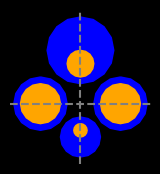

Relationship: Contains


In [8]:
def contains_multi_region_example():
    circle4_left = shapely.Polygon(circle_points(2, offset_x=-3))
    circle4_right = shapely.Polygon(circle_points(2, offset_x=3))
    circle3_left = shapely.Polygon(circle_points(1.5, offset_x=-3))
    circle3_right = shapely.Polygon(circle_points(1.5, offset_x=3))
    circle5_up = shapely.Polygon(circle_points(2.5, offset_y=4))
    circle2_up = shapely.Polygon(circle_points(1, offset_y=3))
    circle3_down = shapely.Polygon(circle_points(1.5, offset_y=-2.5))
    circle1_down = shapely.Polygon(circle_points(0.5, offset_y=-2))
    a = StructureSlice([circle4_left, circle4_right, circle5_up, circle3_down])
    b = StructureSlice([circle3_left, circle3_right, circle2_up, circle1_down])
    return a, b

a, b = contains_multi_region_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

## Surrounds

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Surrounds</th><th>Transitive</t></tr>
<td class="d" colspan="2">
<span class="a">a</span> and <span class="b">b</span> have no interior points in common, and with holes filled <span class="b">b</span> lies in the interior of <span class="a">a</span>.
</td></tr><tr><td colspan="2">
<img src="Images/Relationships/surrounds simple.png" alt="surrounds simple">
<img src="Images/Relationships/surrounds with ring.png" alt="surrounds ring">
</td></tr></table>


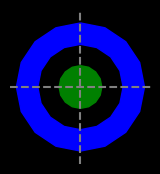

Relationship: Surrounds


In [9]:
def simple_surrounds_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle2 = shapely.Polygon(circle_points(1))

    a = StructureSlice([circle6, circle4])
    b = StructureSlice([circle2])
    return a, b
a, b = simple_surrounds_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SURROUNDS


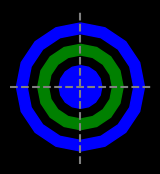

Relationship: Surrounds


In [10]:
def surrounds_middle_ring_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle5 = shapely.Polygon(circle_points(2.5))
    circle4 = shapely.Polygon(circle_points(2))
    circle3 = shapely.Polygon(circle_points(1.5))
    circle2 = shapely.Polygon(circle_points(1))

    a = StructureSlice([circle6, circle5, circle2])
    b = StructureSlice([circle4, circle3])
    return a, b

a, b = surrounds_middle_ring_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SURROUNDS


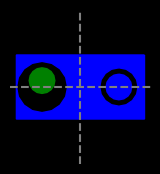

Relationship: Surrounds


In [ ]:
def surrounds_two_holes_example():
    box10x5 = shapely.Polygon(box_points(10,5))
    circle4_left = shapely.Polygon(circle_points(2, offset_x=-3))
    circle3_right = shapely.Polygon(circle_points(1.5, offset_x=3))
    circle2_left = shapely.Polygon(circle_points(1, offset_x=-3, offset_y=0.5))
    circle2_right = shapely.Polygon(circle_points(1, offset_x=3))
    a = StructureSlice([box10x5, circle4_left, circle3_right, circle2_right])
    b = StructureSlice([circle2_left])
    return a, b

a, b = surrounds_two_holes_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SURROUNDS


## Shelters
<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Surrounds</th><th>Transitive</t></tr>
<td class="d" colspan="2">
<span class="a">a</span> and <span class="b">b</span> have no points in common, but the Convex Hull of <span class="a">a</span> contains <span class="b">b</span>.
</td></tr><tr><td colspan="2">
<img src="Images/Relationships/shelters.png" alt="shelters">
</td></tr></table>

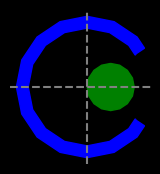

Relationship: Shelters


In [ ]:
def test_shelters_big_hole_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle5 = shapely.Polygon(circle_points(2.5))
    circle4_offset = shapely.Polygon(circle_points(2, offset_x=3.5))
    shell = shapely.difference(circle6, circle5)
    cove = shapely.difference(shell, circle4_offset)
    circle2 = shapely.Polygon(circle_points(1, offset_x=1))

    a = StructureSlice([cove])
    b = StructureSlice([circle2])
    return a, b

a, b = test_shelters_big_hole_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SHELTERS

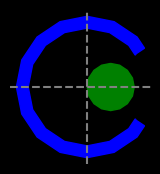

In [13]:
ax = plot_ab(a.exterior, b.contour)

In [14]:
print(DE9IM(a.exterior, b.contour))

|001|
|001|
|111|


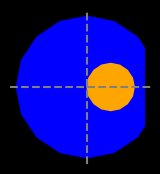

In [15]:
ax = plot_ab(a.hull, b.contour)

In [16]:
r = DE27IM(a, b)
print(r)

|001|	|001|	|111|
|001|	|001|	|001|
|111|	|111|	|001|



In [17]:
print(str(r.test_binaries[1]))

RelationshipTest(Relationship: Shelters
  Mask:
    |110|	|000|	|101|
    |110|	|010|	|010|
    |000|	|100|	|100|
  Value
    |000|	|000|	|101|
    |000|	|000|	|000|
    |000|	|100|	|000|




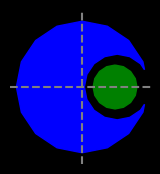

Relationship: Shelters


In [18]:
def shelters_circle_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle3 = shapely.Polygon(circle_points(1.5, offset_x=1.6))
    crescent = shapely.difference(circle6, circle3)
    circle2 = shapely.Polygon(circle_points(1, offset_x=1.5))

    a = StructureSlice([crescent])
    b = StructureSlice([circle2])
    return a, b

a, b = shelters_circle_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SHELTERS

## Disjoint

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Disjoint</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The Convex Hull of 
<span class="a">a</span> has no points in common wuth <span class="b">b</span>.</td></tr>
<tr><td colspan="2">
<img src="Images/Relationships/disjoint.png" alt="Disjoint" style="width: 100px">
</td></tr></table>

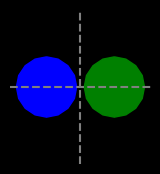

Relationship: Disjoint


In [19]:
def disjoint_example():
    circle4_left = shapely.Polygon(circle_points(4, offset_x=-4.5))
    circle4_right = shapely.Polygon(circle_points(4, offset_x=4.5))

    a = StructureSlice([circle4_left])
    b = StructureSlice([circle4_right])
    return a, b

a, b = disjoint_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.DISJOINT

In [20]:
r = DE27IM(a, b)
print(r)

|001|	|001|	|001|
|001|	|001|	|001|
|111|	|111|	|111|



## Borders

<link rel="stylesheet" href="relations.css">
<table width="400px">
<tr class="l"><th>Borders</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The exterior boundaries of 
<span class="a">a</span> and <span class="b">b</span> 
have more than one point in common, but their interiors do not intersect.
</td></tr>
<tr><td colspan="2">
<img src="Images/Relationships/borders.png" alt="Borders">
<img src="Images/Relationships/Concave Borders.png" alt="Concave Borders"style="width: 50px">
</td></tr></table>

Relationship      Region Test   Exterior Test   Hull Test
Borders           FF*FT****     FF*FT****
        

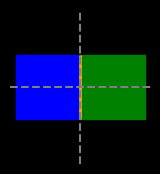

Relationship: Borders


In [21]:
def borders_simple_example():
    box4_left = shapely.Polygon(box_points(4, offset_x=-2))
    box4_right = shapely.Polygon(box_points(4, offset_x=2))

    a = StructureSlice([box4_left])
    b = StructureSlice([box4_right])
    return a, b

a, b = borders_simple_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.BORDERS

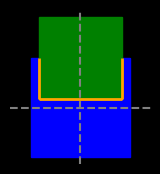

Relationship: Borders


In [22]:
def borders_insert_example():
    box6 = shapely.Polygon(box_points(6))
    box5_up = shapely.Polygon(box_points(5, offset_y=3))
    box6_cropped = shapely.difference(box6, box5_up)

    a = StructureSlice([box6_cropped])
    b = StructureSlice([box5_up])
    return a, b

a, b = borders_insert_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.BORDERS

## Confines (Interior Borders) 

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Confines</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The interior boundary of 
<span class="a">a</span> 
and the exterior boundary of <span class="b">b</span> 
have more than one point in common, but their interiors do not intersect.

For Interior Borders <span class="b">b</span> 
Should be Within <span class="a">a</span>.
</td></tr>
<tr><td colspan="2">
<img src="Images/Relationships/confines.png" alt="Confines" style="width: 100px">
<img src="Images/Relationships/confines with island.png" alt="Confines With Island" style="width: 100px">
</td></tr></table>

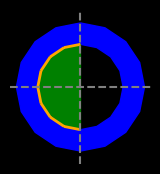

Relationship: Confines


In [23]:
def confines_inner_circle_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    box4_offset = shapely.Polygon(box_points(4, offset_x=2))
    cropped_circle = shapely.difference(circle4, box4_offset)

    a = StructureSlice([circle6, circle4])
    b = StructureSlice([cropped_circle])
    return a, b

a, b = confines_inner_circle_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

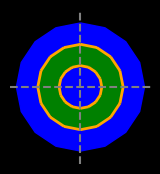

Relationship: Confines


In [24]:
def confines_ring_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle2 = shapely.Polygon(circle_points(1))

    # b has internal borders with the ring portion of a, but has an external
    # border with the island part of a. The internal borders relation wins.
    a = StructureSlice([circle6, circle4, circle2])
    b = StructureSlice([circle4, circle2])
    return a, b

a, b = confines_ring_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

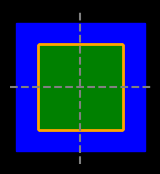

Relationship: Confines


In [25]:
def confines_embedded_box_example():
    # 6 cm x 6 cm box with 4cm x 4 cm hole
    box6 = shapely.Polygon(box_points(6))
    box4 = shapely.Polygon(box_points(4))
    a = StructureSlice([box6, box4])
    b = StructureSlice([box4])
    return a, b

a, b = confines_embedded_box_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

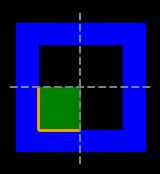

Relationship: Confines


In [26]:
def confines_corner_box_example():
    # 6 cm x 6 cm box with 4cm x 4 cm hole
    box6 = shapely.Polygon(box_points(6))
    box4 = shapely.Polygon(box_points(4))
    box2_offset = shapely.Polygon(box_points(2, offset_x=-1, offset_y=-1))
    a = StructureSlice([box6, box4])
    b = StructureSlice([box2_offset])
    return a, b

a, b = confines_corner_box_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

## Partition

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Partition</th><th></th></tr>
<td class="d" colspan="2">
The boundaries of <span class="a">a</span> and <span class="b">b</span> have more than one point in common.
No points of <span class="b">b</span> are exterior to <span class="a">a</span>, and some points in <span class="a">a</span> are exterior to <span class="b">b</span>.
</td></tr>
<tr><td colspan="2">
<img src="Images/Relationships/partitions simple.png" alt="Partition">
<img src="Images/Relationships/partitions archipelago with island.png" alt="Partition With Island">
<img src="Images/Relationships/partitions partial ring.png" alt="Partition Ring">
</td></tr></table>

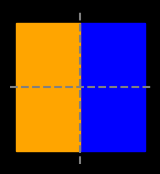

Relationship: Partition


In [27]:
def partition_simple_example():
    box4 = shapely.Polygon(box_points(4))
    box4_cropped = shapely.Polygon(box_points(2, 4, offset_x=-1))
    a = StructureSlice([box4])
    b = StructureSlice([box4_cropped])
    return a, b


a, b = partition_simple_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

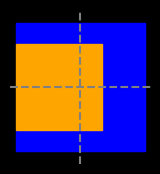

Relationship: Partition


In [28]:
def partition_side_box_example():
    box6 = poly_round(shapely.Polygon(box_points(6)))
    box4_offset = shapely.Polygon(box_points(4, offset_x=-1))
    a = StructureSlice([box6])
    b = StructureSlice([box4_offset])
    return a, b

a, b = partition_side_box_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

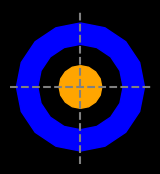

Relationship: Partition


In [29]:
def partition_island_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle2 = shapely.Polygon(circle_points(1))
    a = StructureSlice([circle6, circle4, circle2])
    b = StructureSlice([circle2])
    return a, b

a, b = partition_island_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

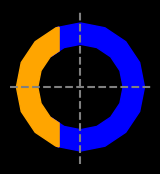

Relationship: Partition


In [30]:
def partition_partial_ring_example():
    # Rounding required because of floating point inaccuracies.
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    box6_offset = shapely.Polygon(box_points(6, offset_x=2))
    ring = shapely.difference(circle6, circle4)
    cropped_ring = poly_round(shapely.difference(ring, box6_offset),PRECISION)
    a = StructureSlice([circle6, circle4])
    b = StructureSlice([cropped_ring])
    return a, b

a, b = partition_partial_ring_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

## Overlaps

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Overlaps</th><th>Symmetric</th></tr>
<td class="d" colspan="2">
<span class="a">a</span> and <span class="b">b</span> 
have some but not all points in common.
</td></tr>
<tr><td colspan="2">
<img src="Images/Relationships/overlaps simple.png" alt="Overlaps">
<img src="Images/Relationships/overlaps ring.png" alt="Overlaps With Ring">
<img src="Images/Relationships/overlaps surounded.png" alt="Overlaps Surrounded">
<img src="Images/Relationships/overlaps ring surrounds simple.png" alt="Ring Overlaps Simple">
<img src="Images/Relationships/archipelago contains simple.png" alt="Ring Overlaps Simple">
</td></tr></table>

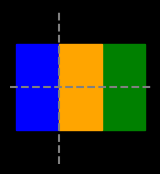

Relationship: Overlaps


In [31]:
def overlaps_box_example():
    box4 = shapely.Polygon(box_points(4))
    box4_offset = shapely.Polygon(box_points(4, offset_x=2))
    a = StructureSlice([box4])
    b = StructureSlice([box4_offset])
    return a, b

a, b = overlaps_box_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS


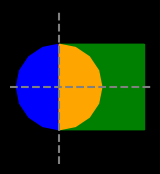

Relationship: Overlaps


In [32]:
def overlaps_box_circle_example():
    circle6 = shapely.Polygon(circle_points(3))
    box6_offset = shapely.Polygon(box_points(6, offset_x=3))

    a = StructureSlice([circle6])
    b = StructureSlice([box6_offset])
    return a, b

a, b = overlaps_box_circle_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS


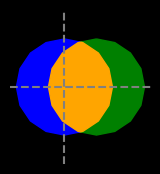

Relationship: Overlaps


In [33]:
def overlaps_circles_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle6_offset = shapely.Polygon(circle_points(3, offset_x=2))
    box4_offset = shapely.Polygon(box_points(4, offset_x=2))

    a = StructureSlice([circle6])
    b = StructureSlice([circle6_offset])
    return a, b

a, b = overlaps_circles_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS


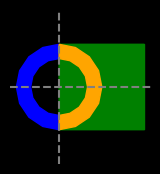

Relationship: Overlaps


In [34]:
def overlaps_ring_box_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    box6_offset = shapely.Polygon(box_points(6, offset_x=3))

    a = StructureSlice([circle6, circle4])
    b = StructureSlice([box6_offset])
    return a, b

a, b = overlaps_ring_box_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS


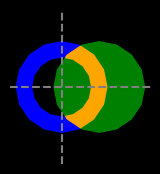

Relationship: Overlaps


In [35]:
def overlaps_ring_circle_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle6_offset = shapely.Polygon(circle_points(3, offset_x=2.5))

    a = StructureSlice([circle6, circle4])
    b = StructureSlice([circle6_offset])
    return a, b

a, b = overlaps_ring_circle_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS


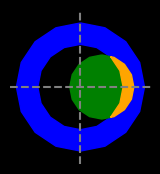

Relationship: Overlaps


In [36]:
def overlaps_surrounded_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle2 = shapely.Polygon(circle_points(1.5, offset_x=1))

    a = StructureSlice([circle6, circle4])
    b = StructureSlice([circle2])
    return a, b

a, b = overlaps_surrounded_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS


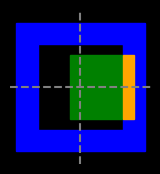

Relationship: Overlaps


In [37]:
def overlaps_surrounded_box_example():
    box6 = shapely.Polygon(box_points(6))
    box4 = shapely.Polygon(box_points(4))
    box3 = shapely.Polygon(box_points(3, offset_x=1))
    a = StructureSlice([box6, box4])
    b = StructureSlice([box3])
    return a, b

a, b = overlaps_surrounded_box_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS


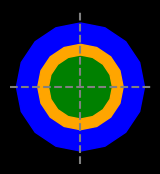

Relationship: Overlaps


In [38]:
def overlaps_ring_surrounded_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle3 = shapely.Polygon(circle_points(1.5))
    circle4 = shapely.Polygon(circle_points(2))

    a = StructureSlice([circle6, circle3])
    b = StructureSlice([circle4])
    return a, b

a, b = overlaps_ring_surrounded_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS


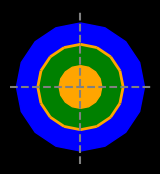

Relationship: Overlaps


In [39]:
def test_overlaps_circle_island_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle3 = shapely.Polygon(circle_points(1.5))
    circle2 = shapely.Polygon(circle_points(1))

    a = StructureSlice([circle6, circle4, circle2])
    b = StructureSlice([circle4])
    return a, b

a, b = test_overlaps_circle_island_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS


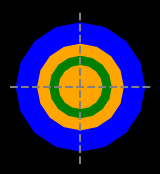

Relationship: Overlaps


In [40]:
def overlaps_concentric_rings():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle3 = shapely.Polygon(circle_points(1.5))
    circle2 = shapely.Polygon(circle_points(1))

    a = StructureSlice([circle6, circle3, circle2])
    b = StructureSlice([circle4])
    return a, b

a, b = overlaps_concentric_rings()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS


## Equals

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Equals</th><th>Symmetric, Transitive</th></tr>
<td class="d" colspan="2">
The interiors of <span class="a">a</span> and <span class="b">b</span> 
intersect and no part of the interior of one geometry intersects the exterior of the other.
</td></tr>
<tr><td colspan="2">
<img src="Images/Relationships/equals.png" alt="Equals">
</td></tr></table>

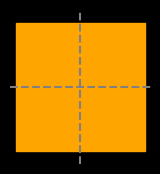

Relationship: Equals


In [41]:
def equals_box_example():
    box6 = shapely.Polygon(box_points(6))
    a = StructureSlice([box6])
    b = StructureSlice([box6])
    return a, b

a, b = equals_box_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.EQUALS


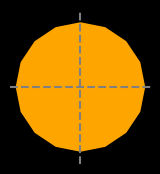

Relationship: Equals


In [42]:
def equals_circle_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle5 = shapely.Polygon(circle_points(2.5))
    cropped_circle = shapely.intersection(circle6, circle5)
    a = StructureSlice([circle5])
    b = StructureSlice([cropped_circle])
    return a, b

a, b = equals_circle_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
assert relation_type == RelationshipType.EQUALS


# Error:
There seems to be a problem with the shapley.relates function. It is not returning the correct relationship between the two polygons.

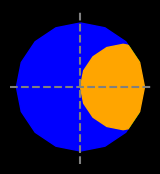

Relationship: Overlaps


In [57]:
def partition_embedded_circle_example():
    # Rounding required because of floating point inaccuracies.
    circle6 = poly_round(shapely.Polygon(circle_points(3)))
    circle4_offset = shapely.Polygon(circle_points(2, offset_x=2))
    cropped_circle = poly_round(shapely.intersection(circle6, circle4_offset))
    a = StructureSlice([circle6])
    b = StructureSlice([cropped_circle])
    return a, b

a, b = partition_embedded_circle_example()
ax = plot_ab(a.contour, b.contour)
relation_type = DE27IM(a, b).identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.PARTITION

In [44]:
print(DE9IM(a.contour, b.contour))

|111|
|111|
|111|


In [45]:
r = DE27IM(a, b)
print(r)
print(str(r.test_binaries[7]))

|111|	|111|	|111|
|111|	|111|	|111|
|111|	|111|	|111|

RelationshipTest(Relationship: Partition
  Mask:
    |101|	|000|	|000|
    |010|	|000|	|000|
    |100|	|000|	|000|
  Value
    |101|	|000|	|000|
    |010|	|000|	|000|
    |000|	|000|	|000|




In [46]:
# Rounding required because of floating point inaccuracies.
circle6 = shapely.Polygon(circle_points(3))
circle4_offset = shapely.Polygon(circle_points(2, offset_x=2))
cropped_circle = shapely.intersection(circle6, circle4_offset)


In [47]:
dif = cropped_circle - circle6
dif.area


0.0

In [48]:
shapely.get_coordinates(dif).tolist()

[]

In [49]:
cropped_circle.relate(circle6)

'212111212'

`'212111212'` is a rather odd relationship code. 
It says that the two polygons both have parts that are exterior to the other, but the difference between cropped_circle and circle6 is an empty polygon.

In [50]:
circle6.relate(cropped_circle)

'212111212'

In [51]:
circle6.relate(circle4_offset)

'212101212'

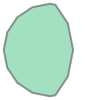

In [52]:
shapely.simplify(cropped_circle, 10**-PRECISION)

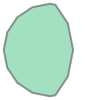

In [53]:
shapely.snap(cropped_circle, circle6, 10**-PRECISION)

In [54]:
a = StructureSlice([circle6])
b = StructureSlice([cropped_circle])


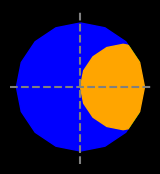

('212111212', '212111212', '212111212')
|111|	|111|	|111|
|111|	|111|	|111|
|111|	|111|	|111|



'212111212'

In [55]:
a, b = partition_embedded_circle_example()
plot_ab(a.contour, b.contour)
contour = a.contour.relate(b.contour)
external = a.exterior.relate(b.contour)
convex_hull = a.hull.relate(b.contour)
relation_group = (contour, external, convex_hull)
print(relation_group)
relation = DE27IM(a, b)
print(relation)
a.contour.relate(b.contour)
a.exterior.relate(b.contour)
a.hull.relate(b.contour)

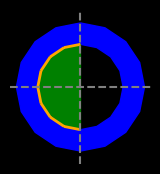

('FF2F11212', '212FF1FF2', '212FF1FF2')
|001|	|111|	|111|
|011|	|001|	|001|
|111|	|001|	|001|



In [56]:
a, b = confines_inner_circle_example()
plot_ab(a.contour, b.contour)
contour = a.contour.relate(b.contour)
external = a.exterior.relate(b.contour)
convex_hull = a.hull.relate(b.contour)
relation_group = (contour, external, convex_hull)
print(relation_group)
relation = DE27IM(a, b)
print(relation)